# Imports

Import basic libraries and csv files

In [135]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style = 'white')

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import PReLU
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [137]:
# get data file names
path =r'/content/drive/MyDrive/Feature Collections/Complete Datasets 2'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
data = pd.concat(dfs, ignore_index=True)
data = data.sort_values(by = 'Date')

data

,Unnamed: 0,Date,elevation,forecast_albedo,skin_temperature,surface_solar_radiation_downwards,total_precipitation,snow_acc,snowmelt_calc
7706,41,1475280000000,5063,0.336907,277.856594,1.449688e+07,0.008040,0.008041,0.101281
7693,9,1475280000000,4864,0.814329,273.007473,1.405968e+07,0.003585,0.003594,0.298582
7694,10,1475280000000,5317,0.815468,272.197821,1.535189e+07,0.002938,0.002943,0.233705
7695,11,1475280000000,5820,0.737871,272.969957,1.598729e+07,0.002574,0.002577,0.279766
7696,16,1475280000000,4564,0.806369,272.187974,1.496663e+07,0.004607,0.004611,0.153071
...,...,...,...,...,...,...,...,...,...
163,7566,1617062400000,5907,0.861473,268.542887,1.205998e+07,0.009062,0.009291,0.000000
1595,7578,1617062400000,5820,0.852102,267.419759,1.144651e+07,0.005592,0.005664,0.000691
1594,7574,1617062400000,1582,0.227713,280.016113,6.844714e+06,0.033226,0.034696,0.067538
170,7569,1617062400000,4751,0.631155,273.152018,9.568639e+06,0.016952,0.017494,0.000000


# Data preprocessing

In [138]:
dt = data
# dt = dt[dt['snowmelt_calc']!=0]
dt[['skin_temperature','elevation','surface_solar_radiation_downwards']] = (dt[['skin_temperature','elevation','surface_solar_radiation_downwards']] - dt[['skin_temperature','elevation','surface_solar_radiation_downwards']].min())/(dt[['skin_temperature','elevation','surface_solar_radiation_downwards']].max() - dt[['skin_temperature','elevation','surface_solar_radiation_downwards']].min())
dt.head()

,Unnamed: 0,Date,elevation,forecast_albedo,skin_temperature,surface_solar_radiation_downwards,total_precipitation,snow_acc,snowmelt_calc
7706,41,1475280000000,0.768433,0.336907,0.879205,0.570451,0.008040,0.008041,0.101281
7693,9,1475280000000,0.724503,0.814329,0.773639,0.548294,0.003585,0.003594,0.298582
7694,10,1475280000000,0.824503,0.815468,0.756013,0.613782,0.002938,0.002943,0.233705
7695,11,1475280000000,0.935541,0.737871,0.772823,0.645983,0.002574,0.002577,0.279766
7696,16,1475280000000,0.658278,0.806369,0.755799,0.594257,0.004607,0.004611,0.153071


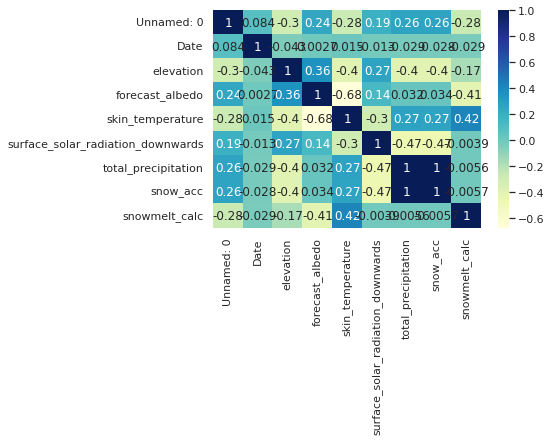

<Figure size 720x720 with 0 Axes>

In [139]:
dataplot = sns.heatmap(dt.corr(), cmap="YlGnBu", annot=True)
plt.figure(figsize=(10,10))
plt.show()

In [140]:
X = dt[['skin_temperature','forecast_albedo','elevation','surface_solar_radiation_downwards','total_precipitation','snow_acc']]
y = dt['snowmelt_calc']

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=122,
                                                    shuffle = False)
# print("Labels for training and testing data")
# print(train_y)
# print(test_y)

In [141]:
train_X

,skin_temperature,forecast_albedo,elevation,surface_solar_radiation_downwards,total_precipitation,snow_acc
7706,0.879205,0.336907,0.768433,0.570451,0.008040,0.008041
7693,0.773639,0.814329,0.724503,0.548294,0.003585,0.003594
7694,0.756013,0.815468,0.824503,0.613782,0.002938,0.002943
7695,0.772823,0.737871,0.935541,0.645983,0.002574,0.002577
7696,0.755799,0.806369,0.658278,0.594257,0.004607,0.004611
...,...,...,...,...,...,...
2041,0.583438,0.854687,0.824503,0.203734,0.014938,0.015312
2871,0.693236,0.814337,0.724503,0.144845,0.040426,0.041416
2870,0.800251,0.505796,0.561369,0.123139,0.039311,0.040119
1691,0.474695,0.849993,0.817439,0.182844,0.001754,0.001917


In [142]:
train_X.shape

(6435, 6)

# Model creation and testing

## Model Architecture

In [143]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# # create and fit the LSTM network
# model = Sequential()
# model.add(Bidirectional(GRU(30),input_shape = (6,1)))
# model.add(PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None))
# model.add(Dense(48,activation = None))
# model.add(PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None))
# model.add(Dense(1,activation = 'gelu'))
# reduce_lr = ReduceLROnPlateau(monitor='loss', mode ='min',factor=0.4,
#                               patience=10, min_lr=0.000000001)
# checkpoint_filepath = '/content/temp/checkpoint'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_root_mean_squared_error',
#     mode='min',
#     save_best_only=True)

# model.compile(loss=tf.keras.losses.MeanSquaredError(),
#               optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0006),
#               metrics=['RootMeanSquaredError'])
# print(model.summary())
# history = model.fit(train_X, train_y,callbacks = [model_checkpoint_callback],validation_split=0.3, epochs=400, verbose=0)
# plt.plot(history.history['root_mean_squared_error'])
# plt.plot(history.history['val_root_mean_squared_error'])
# plt.title('model rmse')
# plt.ylabel('val_rmse')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# print(history.history['root_mean_squared_error'][-1],history.history['val_root_mean_squared_error'][-1])

## Model results and testing

In [144]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Models/gru_bi_0985")

In [148]:
# Model prediction
temp= model.predict(test_X)
temp[temp<0]=0

#Results Stats
import math
from sklearn.metrics import mean_squared_error # MSE
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import r2_score#R square

mse = mean_squared_error(test_y,temp)
rmse = math.sqrt(mse)
mae = mean_absolute_error(test_y,temp)
r2 = r2_score(test_y,temp)
norm_rmse = rmse/(float(dt['snowmelt_calc'].max()-dt['snowmelt_calc'].min()))
print('MSE:',mse,'\nRMSE:',rmse,'\nMAE:',mae,'\nR2:',r2,'\nNormalized RMSE:',norm_rmse,'\nSlope:',m,'\nIntercept:',b)

MSE: 0.0013251917153001241 
RMSE: 0.036403182763326124 
MAE: 0.025052991677612792 
R2: 0.29908043520436656 
Normalized RMSE: 0.09853165931938408 
Slope: [0.3081965] 
Intercept: [0.02086308]


In [162]:
slope = float(m)
intercept = float(b)
slope,intercept

(0.3081965021382132, 0.020863077872575624)

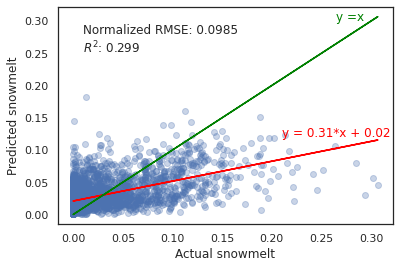

In [203]:
#Visualization of results
plt.scatter(test_y,temp,cmap = 'virdis',alpha = 0.3)
m, b = np.polyfit(test_y, temp, 1)
plt.xlabel('Actual snowmelt')
plt.ylabel('Predicted snowmelt')
plt.plot(test_y, m*test_y + b,color = 'red')
plt.plot(test_y, 1*test_y + 0,color = 'green')
plt.text(0.01,0.25, 'Normalized RMSE: '+str(np.round(norm_rmse,4))+'\n$R^2$: '+str(np.round(r2,3)))
plt.text(0.21,0.12, 'y = '+str(round(slope,2))+'*x + '+str(round(intercept,2)),color = 'red',fontsize = 12)
plt.text(0.265,0.3, 'y =x',fontsize = 12,color = 'green')
plt.savefig('1_day_graph.tif',dpi = 300)
plt.show()

In [147]:
# model.save('/content/drive/MyDrive/Models/gru_bi_0995')